In [2]:
# --- 1. Supervised ML

# -------a) Regression Models

# ---------- 1) Linear Regression Models
#--------------- I.  Simple Linear Regression Model
#----------------II. Multiple Linear Regression
#----------------III.Ridge Regression
#----------------IV. Lasso Regression
#----------------V.  Elastik Net Regression


#------------2) Non-Linear Regression Model
#----------------I.  K Nearest Neigbor (KNN)
#----------------II. Support Vector Regression (SVR)
#-----------------*  Naive Bayes
#----------------III.Artificial Neural Networks
#----------------IV. Classification and Regression Tree / Decision Tree (CART)


#------------3) Ensemble Models

#----------------I.  Random Forest
#----------------II. Gradient Boosting Machine (GBM)
#----------------III.XGBoost
#----------------IV. Light GBM
#----------------V.  Category Boosting (CatBoost)

#--------b) Classification Models
#----------------I.  Logictic Regression
#----------------II. K Nearest Neighbor
#----------------III.Support Vektor Machine (SVM)
#----------------IV. Artificial  Neural Networks
#----------------V.  Decision Trees (CART)

#----------------VI. Random Forest
#----------------VII.Gradient Boosting Machine
#----------------VIII.XGBoost
#----------------IX. Ligth GBM
#----------------X.  CatBoost

#---2.Unsupervised ML

#---------a) K-Means
#---------b) Hierarchical Cluster Analysis
#---------c) Principal Component Analysis

#---3.Semi-supervised ML (not included)

#---4.Reinforcement ML (not included)

 ***Linear Regression Models***
 
  Content:
 
 1.  Simple Linear Regression Model
 2. Multiple Linear Regression
 3. Ridge Regression
 4. Lasso Regression
 5.  Elastik Net Regression

## <b>1. Simple Linear Regression<b/>

- It consists of 1 dependent variable and 1 independent variable

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("/Users/User/Advertising.csv")

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.iloc[:,1:len(df)]

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


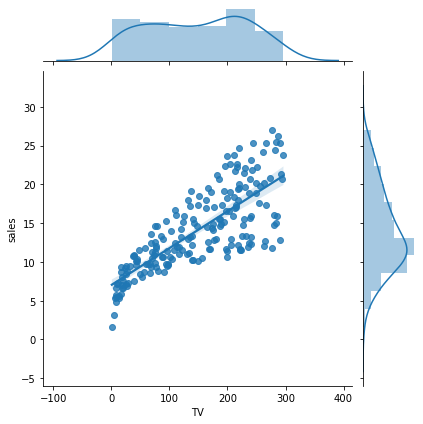

In [6]:
import seaborn as sns
sns.jointplot(x="TV", y="sales", data=df, kind="reg");

In [7]:
X=df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [8]:
y=df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


Now, we are creating linear model below.

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # This is model object
model = lr.fit(X,y) # set up a model
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
str(model)

'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)'

In [11]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [12]:
model.intercept_ # B0 intercept : Y eksenini kestigi nokta

array([7.03259355])

In [13]:
model.coef_  # B1 coefficient

array([[0.04753664]])

y = B0 + B1*X1 + e

y = 7.03259355 + 0.04753664 * X1 

***Let's find r2 (score)***
- r2 is the clarification percentage of the change in dependent variable by independent variables. / Bagimli degiskenin bagimsiz degiskenlerce aciklanma yuzdesidir.



In [14]:
model.score(X,y) # y is clarified by X in the ratio of 0.6118... / y'nin X tarafindan aciklanma yuzdesi

0.611875050850071

Let's visualize the model to understand better.

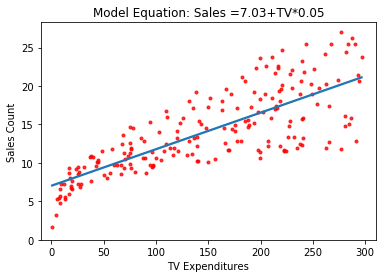

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

g= sns.regplot(df.TV, df.sales, ci=None, scatter_kws={'color':'r', 's':9})  # ci refers to confidence interval
g.set_title("Model Equation: Sales =7.03+TV*0.05")
g.set_ylabel("Sales Count")
g.set_xlabel("TV Expenditures")
plt.xlim(-10,310)
plt.ylim(bottom=0);

***Prediction***
- Now we can give one or multiple value(s) value for X variable, and get a prediction for Y variable

In [16]:
# y = B0 + B1*X1 + e

y_ = 7.03259355 + 0.04753664 * 10    # Not same as model result below. What is mistake here?
y_

7.50795995

In [17]:
# This is the same as "y = B0 + B1*X1 + e", so result must be same!
model.predict([[10]])

array([[7.50795995]])

In [18]:
multiple_model = [[50],[100],[150]]
model.predict(multiple_model)

array([[ 9.40942557],
       [11.78625759],
       [14.16308961]])

In [19]:
y_pred = model.predict(X)
y_pred[:5]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814]])

In [20]:
from sklearn.metrics import mean_squared_error , r2_score
import numpy as np

print(mean_squared_error(y, y_pred))
print(np.sqrt(mean_squared_error(y, y_pred)))

10.512652915656757
3.2423221486546887


### Errors: MSE, RMSE
- Errors are the most important subject to comprehend optimization approaches.
- Let's find errors for the first 10 y value, then let's find the mean error and mean squared error manually

<i>y value : dependent variable / target variable / labeled variable<i/>

In [21]:
 real_y = y[:10]

In [22]:
predicted_y = pd.DataFrame(model.predict(X)[:10])

In [23]:
errors = pd.concat([real_y, predicted_y], axis=1)

In [24]:
errors.columns = ["real_y", "predicted_y"]

In [25]:
errors["error"] = errors["real_y"] - errors["predicted_y"]

In [26]:
errors["square_error"] = errors["error"]**2

In [27]:
errors

,real_y,predicted_y,error,square_error
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [28]:
print(np.mean(errors["square_error"]))
np.mean(errors["error"])

9.290350329638105


0.20389815715192317

## <b>2. Multiple Linear Model<b/>

yi = B0 + B1*X1 + B2*X2 + B3*X3 + ... +Bp*Xp + ei

In [29]:
import pandas as pd
df = pd.read_csv("/Users/User/Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [30]:
X = df.drop("sales", axis=1)
y = df[["sales"]]
X,y

(        TV  radio  newspaper
 0    230.1   37.8       69.2
 1     44.5   39.3       45.1
 2     17.2   45.9       69.3
 3    151.5   41.3       58.5
 4    180.8   10.8       58.4
 ..     ...    ...        ...
 195   38.2    3.7       13.8
 196   94.2    4.9        8.1
 197  177.0    9.3        6.4
 198  283.6   42.0       66.2
 199  232.1    8.6        8.7
 
 [200 rows x 3 columns],
      sales
 0     22.1
 1     10.4
 2      9.3
 3     18.5
 4     12.9
 ..     ...
 195    7.6
 196    9.7
 197   12.8
 198   25.5
 199   13.4
 
 [200 rows x 1 columns])

We have 2 library to set up Linear model

1. Statsmodel 
2. Scikit-learn

In [31]:
# 1. Statsmodel

import statsmodels.api as sm
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Thu, 14 Jan 2021   Prob (F-statistic):                   2.43e-171
Time:                        10:50:19   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***R-squared:*** percentage of explanation of independent variable with dependent variables \
***F-statistic:*** it is used to test significance of model \
***Prob(F-statistic):*** P-value of F statistic 

***coef:*** coefficient of variables in model \
***std err:*** standard deviation of coefficient \
***t:*** level of significance of coefficient \
***P>|t|:*** P-value of t


In [32]:
# 1. scikit-learn

from sklearn.linear_model import LinearRegression
lm =LinearRegression()
model = lm.fit(X,y)

In [33]:
model.intercept_ , model.coef_

(array([2.93888937]), array([[ 0.04576465,  0.18853002, -0.00103749]]))

***The model outputs help us understand how Logistic Regression will run***

yi = B0 + B1X1 + B2X2 + B3X3 + ... +BpXp + ei

sales = 2.93888937 + TV*0.04576465 + radio*0.18853002 -newspaper*0.00103749

***Prediction*** \
Let's make prediction we created model above

In [34]:
sample_data =[[300],[120],[400]]
sample_data =pd.DataFrame(sample_data).transpose()
sample_data

,0,1,2
0,300,120,400


In [35]:
print(model.predict(sample_data))
sales = 2.93888937 + 300*0.04576465 + 120*0.18853002 -400*0.00103749
sales

[[38.87688782]]


38.876890769999996

In [36]:
# Let's assess the success ratio finding Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

y_pred = model.predict(X)

In [37]:
# MSE

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y,y_pred)
MSE

2.784126314510936

In [38]:
# RMSE

import numpy as np
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

### MODEL VALIDATION

- This is not MODEL TUNING because Linear Regression doesn't have hyperparameter 

***a) HoldOut Method*** / train_test_split

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state =90)

In [40]:
X_train.head(), X_test.head(), y_train.head(), y_test.head()

(        TV  radio  newspaper
 23   228.3   16.9       26.2
 177  170.2    7.8       35.2
 99   135.2   41.7       45.9
 39   228.0   37.7       32.0
 186  139.5    2.1       26.6,
         TV  radio  newspaper
 193  166.8   42.0        3.6
 15   195.4   47.7       52.9
 82    75.3   20.3       32.5
 161   85.7   35.8       49.3
 184  253.8   21.3       30.0,
      sales
 23    15.5
 177   11.7
 99    17.2
 39    21.5
 186   10.3,
      sales
 193   19.6
 15    22.4
 82    11.3
 161   13.3
 184   17.6)

In [41]:
# Let's train model using train dataset

lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [42]:
# Now, let's test the model using test dataset and find error

y_pred = model.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

1.568575381046891

***b) K-fold cross validation method*** / cross_val_score

In [43]:
from sklearn.model_selection import cross_val_score
?cross_val_score

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like
    The data to fit. Can be for example a list, or an array.

y : array-like, optional, default: None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like, with shape (n_samples,), optional
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : string, callable or None, optional, default: None
    A string (see model evaluation documentation) or
    a scorer call

In [44]:
cvs = cross_val_score(model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error" )
cvs

array([-2.43273543, -3.81922241, -2.54558373, -2.57458218, -2.15655163,
       -1.95128561, -8.88200275, -2.41366311, -2.68300111, -1.76206261])

In [45]:
# MSE

MSE = np.mean(-cvs) # We should put minus(-) in front of cvs model if we use scoring = "neg_mean_squared_error" 
MSE

3.12206905567462

In [46]:
# RMSE

RMSE = np.sqrt(MSE)
RMSE

1.7669377622527116

## <b>3. RIDGE Regression<b/> / L1

Amac hata kareler toplamini (Sum of Square Error (SSE)) minimize eden katsayilari, bu aktsayilara ceza uygulayarak bulmaktir.

In [47]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In our sample data, we will make salary prediction. 

Let's import data and prepare to use in our model

In [48]:
df = pd.read_csv("/Users/User/hitters.csv")

df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [50]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [51]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [52]:
df = df.dropna()
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


Now let's apply ONE HOT ENCODING to convert categorical data into numerical

In [53]:
dms = pd.get_dummies(df[["League", "Division","NewLeague"]])
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


Data is ready to use in modelling. Let's apply ***HoldOut***

<i>Note:K-fold cross validation gives better result in Ridge model<i/>

Now, we need to split data into train and test group.


In [54]:
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")

In [55]:
# It is sufficient to get one of both from League_A and League_B, DivisionE and Division_W, NewLeague_A and NewLeague_N.

X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis =1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state=42)

Now, let's set up model using train and test data

In [57]:
?Ridge

Init signature:
Ridge(
    alpha=1.0,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    random_state=None,
)
Docstring:     
Linear least squares with l2 regularization.

Minimizes the objective function::

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
This estimator has built-in support for multi-variate regression
(i.e., when y is a 2d-array of shape (n_samples, n_targets)).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : {float, ndarray of shape (n_targets,)}, default=1.0
    Regularization strength; must be a positive float. Regularization
    improves the conditioning of the problem and reduces the variance of
    the estimates. Larger values specify stronger regularization.
    Alpha co

In [58]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [60]:
ridge_model.intercept_

-4.578626905721308

Lambda has a critical role to optimize the model. So let's make a list and try each value for lambda

In [61]:
lambda_serries = 10**np.linspace(10, -2, 100)*0.5

In [62]:
ridge_model = Ridge()
coefficients = []

for i in lambda_serries:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train, y_train)
    coefficients.append(ridge_model.coef_)

In [63]:
len(coefficients)*len(coefficients[0]) # we have 1900 values in the coefficient list

1900

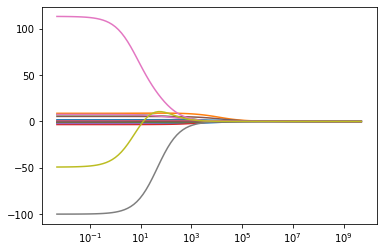

In [64]:
ax = plt.gca()
ax.plot(lambda_serries,coefficients)
ax.set_xscale("log")

The more lambda values increase, the more insignificant values approach to zero in the graph above.

Now, let's observe/compare predicted y with real y.

In [68]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_train)

y_pred_df = pd.DataFrame(y_pred)
y_train_df = pd.DataFrame(y_train)

y_pred_real= pd.concat([y_pred_df, y_train_df], axis=1)
y_pred_real.columns = ["y_predict", "y_real"]

y_pred_real

,y_predict,y_real
0,376.252454,NaN
1,803.384981,475.0
2,496.176697,480.0
3,112.695546,500.0
4,427.600202,91.5
...,...,...
315,NaN,165.0
317,NaN,700.0
319,NaN,385.0
320,NaN,960.0


In [70]:
# Current Train Error

MSE = mean_squared_error(y_train, y_pred)
RMSE = np.sqrt(MSE)
RMSE

289.34470696006565

***Model Tuning***

Firstly let's prefer ***k-fold cross validation*** that gives better results in Ridge Regression. \
- How were we using K-fold cross validation?

In [81]:
csv = cross_val_score(ridge_model, X_train, y_train, cv=10, scoring ="neg_mean_squared_error")
csv

array([-254472.04580573,  -60833.45970379, -154767.02339014,
        -85062.49424023,  -69816.89068641, -129298.84224708,
       -111727.92225975,  -85814.81291499,  -58347.4474604 ,
       -224630.58012366])

In [82]:
RSME = np.sqrt(-csv)
RSME

array([504.45222351, 246.6443993 , 393.40440184, 291.65475179,
       264.22886043, 359.58148207, 334.25726957, 292.94165446,
       241.55216302, 473.95208632])

- Let's create random lambda values and optimize model using its lambda parameter.

In [102]:
lambda1 = 10**np.linspace(10,-2,100)*.5 


***RidgeCV():***  we utilize it to find optimum lambda value

In [103]:
ridgecv = RidgeCV(alphas= lambda1, scoring = "neg_mean_squared_error", cv=10, normalize=True)

In [104]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [105]:
# This gives optimum lambda value.
ridgecv.alpha_

0.7599555414764666

- Final Tuned Model

In [106]:
ridge_tuned = Ridge(alpha=ridgecv.alpha_).fit(X_train, y_train)

In [107]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.858304727152

RESULT: It appears that default model gives better result than tuned. Then we can prefer default model for this dataset.

## <b>3. LASSO Regression<b/> / L2
    
    Lasso, Ridge'nin ilgili ilgisiz tum degiskenlerini modelde birakma dezavantajini gidermek icin onerilmistir.

In [109]:
# Prepare data

df= pd.read_csv("/Users/User/Hitters.csv")
df= df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y= df["Salary"]
X_= df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[["League_N","Division_W", "NewLeague_N" ]]], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25, random_state=42)

In [110]:
# set up Lasso model

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
lasso_model =Lasso().fit(X_train,y_train)
lasso_model

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850385, tolerance: 3898.686956380658
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
# I don't want to see warning messages anymore!
import warnings
warnings.filterwarnings("ignore")

In [121]:
# coefficients against various lambda values

lasso = Lasso()
coefs =[]
alphas =  np.random.randint(0,100000,10)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

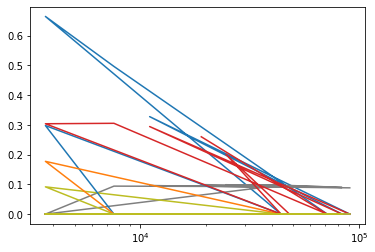

In [122]:
# let's visualize

#ax= plt.gca()  # gca = get current axes
plt.plot(alphas, coefs)
plt.xscale("log")
plt.show();

In [123]:
lasso = Lasso()
coefs =[]
alphas = 10**np.linspace(10,-2,100)*0.5
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

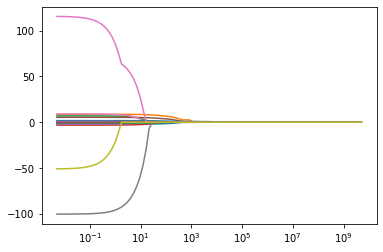

In [124]:
ax= plt.gca()  # gca = get current axes
ax.plot(alphas, coefs)
ax.set_xscale("log")

***Prediction***

- Warning: What is important Test Error. It doesn't make sense to make Train Error

lasso_model.predict(X_test)[:5]

In [129]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.0975884554033

In [130]:
# percentage of dependent variable explaination with independent variable / bagimsiz deg ile bagimli deg aciklanma yuzdesi
r2_score (y_test, y_pred)

0.4142279813236619

***Model Tuning***

In [131]:
?LassoCV

Init signature:
LassoCV(
    eps=0.001,
    n_alphas=100,
    alphas=None,
    fit_intercept=True,
    normalize=False,
    precompute='auto',
    max_iter=1000,
    tol=0.0001,
    copy_X=True,
    cv=None,
    verbose=False,
    n_jobs=None,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Lasso linear model with iterative fitting along a regularization path.

See glossary entry for :term:`cross-validation estimator`.

The best model is selected by cross-validation.

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
eps : float, optional
    Length of the path. ``eps=1e-3`` means that
    ``alpha_min / alpha_max = 1e-3``.

n_alphas : int, optional
    Number of alphas along the regularization path

alphas : numpy array, optional
    List of alphas where to compute the models.
    If ``None`` alphas are set automatically

fit_int

In [133]:
lasso_cv_model = LassoCV(cv=10, max_iter=100000).fit(X_train,y_train)
lasso_cv_model.alpha_

563.4670501833854

In [135]:
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_).set_params(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)
# lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)  <--- same as above
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

373.5957225069793

In [136]:
# Now let's designated coefficient to independent variables

pd.Series(lasso_tuned.coef_, index=X_train.columns)

AtBat         -0.000000
Hits           2.533141
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.520003
Years          0.000000
CAtBat        -0.188935
CHits          0.360895
CHmRun        -0.000000
CRuns          0.835617
CRBI           0.427816
CWalks         0.000527
PutOuts        0.279218
Assists        0.081443
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

## <b>4. ElasticNet Regression<b/>
    
- The goal is same as Ridge and Lasso. ElasticNet merges L1 and L2 methods
    
We will use same dataset and create model firstly.

In [137]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [139]:
df= pd.read_csv("/Users/User/Hitters.csv")
df= df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y= df["Salary"]
X_= df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[["League_N","Division_W", "NewLeague_N" ]]], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25, random_state=42)

In [140]:
# create model

enet_model = ElasticNet().fit(X_train, y_train)
print(enet_model)
enet_model.intercept_

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


-6.465955602113127

In [141]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

***Prediction***

In [143]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

357.1676548181244

In [144]:
# R squared

r2_score(y_test, y_pred)

0.41070222469326945

***Model Tuning***

In [146]:
# Let's find optimum lambda value:

enet_cv_model=ElasticNetCV(cv=10).fit(X_train, y_train)
enet_cv_model.alpha_ # alpha_ is optimum lambda value

5230.7647364798695

In [147]:
enet_cv_model.intercept_

-38.5194055839429

In [148]:
enet_cv_model.coef_

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

***Final Model***

In [149]:
enet_tuned = ElasticNet(enet_cv_model.alpha_).fit(X_train, y_train)
y_pred = enet_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795